# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
pip install phik

     |████████████████████████████████| 679 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import phik

In [3]:
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
data[data.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
def distribution(column):
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.title(column)
    plt.ylabel('Количество')
    plt.hist(data[column])
    plt.show()

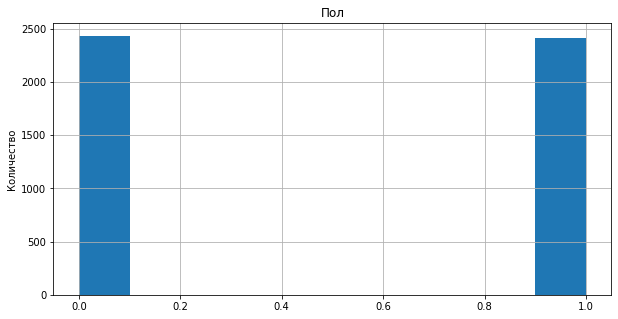

In [10]:
distribution('Пол')

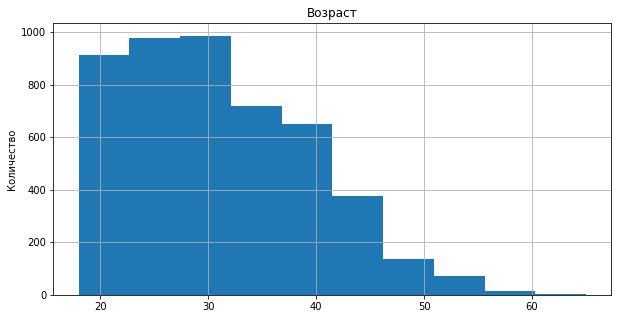

In [11]:
distribution('Возраст')

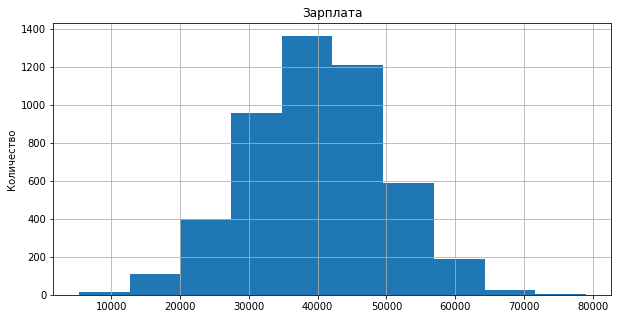

In [12]:
distribution('Зарплата') #Данные распределены нормально

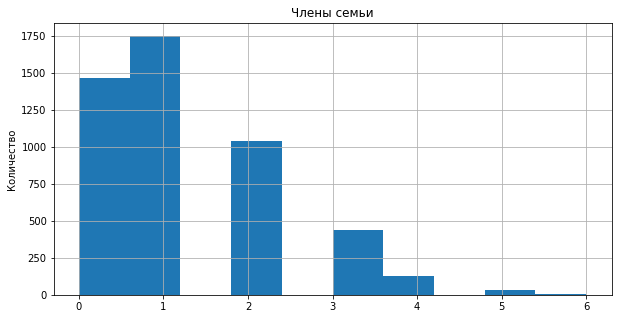

In [13]:
distribution('Члены семьи')

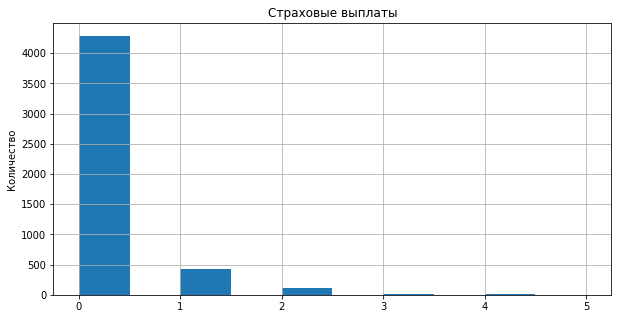

In [14]:
distribution('Страховые выплаты')

In [15]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [16]:
data_without = data[['Зарплата', 'Страховые выплаты']]

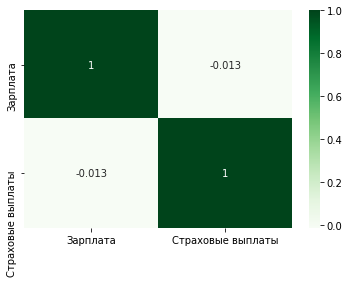

In [17]:
sns.heatmap(data_without.corr(), cmap='Greens', annot=True); #Оставлен столбец зарплата, т. к. данные распределены нормально.
#По коэффициенту корреляции видно, что страховые выплаты не зависят от зарплаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**  Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** При умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** Подставим в уравнение весов произведение матрицы признаков $X$ и обратимой матрицы $Р$ вместо матрицы $X$.
$$
w_n = ((XP)^T (XP))^{-1} (XP)^T y
$$
Раскроем скобки:
$$w_n = (P^TX^TXP)^{-1}P^TX^Ty$$ $$w_n = (P^T(X^TX)P)^{-1}P^TX^Ty$$ $$w_n = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$ $$w_n = P^{-1}(X^TX)^{-1}EX^Ty$$ $$w_n = P^{-1}(X^TX)^{-1}X^Ty$$$$w_n=P^{-1}w$$
Подставим полученное уравнение в формулу предсказаний:
$$a_n = XPw_n$$ $$a_n = XPP^{-1}w$$ $$a_n = XEw$$ $$a_n = Xw$$ $$a_n = a$$
Из преобразований видно, что при замене матрицы $X$ на произведение матриц $X$ и $P$ предсказания не изменяются

**Вывод:** Выше математически был получен результат, что предсказания не изменятся. В свою очередь вектор весов изменился для новых признаков, следовательно потребуется модель обучить заново.

## Алгоритм преобразования

**Алгоритм**

Напишем алгоритм и рассчитаем предсказания

Создадим матрицу 4х4, так как основных признаков - 4.

In [18]:
P = np.random.randint(10, size=(4,4))
P

array([[9, 5, 4, 7],
       [7, 1, 6, 3],
       [8, 6, 5, 4],
       [4, 0, 4, 9]])

Проверим ее обратимость

In [19]:
P_inv = np.linalg.inv(P)
P_inv

array([[ 3.67986799e-01,  1.60066007e-01, -3.33333333e-01,
        -1.91419142e-01],
       [-1.60066007e-01, -1.99669967e-01,  3.33333333e-01,
         4.29042904e-02],
       [-4.12541254e-01,  6.27062706e-02,  3.33333333e-01,
         1.51815182e-01],
       [ 1.98019802e-02, -9.90099010e-02,  3.81066649e-17,
         1.28712871e-01]])

In [20]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [21]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.25, random_state=12354)

In [22]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

Вычислим вектор весов и вектор предсказаний для изначальной матрицы

In [23]:
w = np.linalg.inv(train_features_scaled.T @ train_features_scaled) @ train_features_scaled.T @ train_target
a = train_features_scaled @ w

Сделаем тоже самое для произведения Х на Р

In [24]:
train_features_scaled_n = train_features_scaled @ P
w_n = np.linalg.inv(train_features_scaled_n.T @ train_features_scaled_n) @ train_features_scaled_n.T @ train_target
a_n = train_features_scaled_n @ w_n

Посчитаем разницу между полученными предсказаниями

In [25]:
diff = a - a_n
diff.sum()

-6.948602934361836e-14

Видно, что разница ничтожно мала и разница стремится к 0.

**Обоснование**

Видно, что разница предсказаний ничтожно мала, можно считать что равна 0. Следовательно подтверждено, что предсказания не изменятся.

## Проверка алгоритма

Напишем функцию для обучения модели, которая на выходе дает метрики MSE и R2.

Исходные данные

In [26]:
model = LinearRegression()
model.fit(train_features_scaled, train_target)
predictions = model.predict(test_features_scaled)
print('MSE модели:', mean_squared_error(test_target, predictions))
print('R2 модели:', r2_score(test_target, predictions))

MSE модели: 0.11450473464319581
R2 модели: 0.4231056652397094


Новые данные

In [27]:
test_features_scaled_n = test_features_scaled @ P

In [28]:
model = LinearRegression()
model.fit(train_features_scaled_n, train_target)
predictions = model.predict(test_features_scaled_n)
print('MSE модели:', mean_squared_error(test_target, predictions))
print('R2 модели:', r2_score(test_target, predictions))

MSE модели: 0.11450473464319579
R2 модели: 0.4231056652397095


Видно, что значения метрик не изменились.

Проверим возможность восстановления зашифрованных данных на всех фичах. Действия будут обратные:  
- умножение фичей на обратимую матрицу Р;
- использование scaled.inverse_transform() для обратного масштабирования  
Видно, что присутствуют незначительные отклонения от исходных данных в столбцах Пол и Члены семьи.

In [29]:
print(train_features_scaled_n)
print()
print(test_features_scaled_n)

[[ 11.8358701    6.68907292   5.87172259   7.07283024]
 [-17.81214427  -5.02348675 -12.09370952 -11.92490516]
 [  3.2801297    4.78733644  -1.20196501   3.32614461]
 ...
 [ 18.23250818   8.47650561  11.02052128   9.91702624]
 [-15.83156244 -11.83948973  -8.00357736 -18.61565497]
 [  2.53209585  -1.51913035   0.8491115    8.98059421]]

[[ -1.42545332  -0.48560719   1.43383658   2.0608248 ]
 [  6.58988111   5.48997671   1.2252817   -1.93275381]
 [-13.89459573 -12.84750987  -5.20847753  -4.52786945]
 ...
 [-14.28121383 -14.32021965  -4.03245365  15.25287729]
 [-15.73152345  -7.97808994  -9.06697166 -11.41577932]
 [-10.79681658  -5.05338446  -6.00776109 -15.744159  ]]


In [30]:
train_features_scaled_n_P_inv = train_features_scaled_n @ P_inv
print(train_features_scaled_n_P_inv)
print()
test_features_scaled_n_P_inv = test_features_scaled_n @ P_inv
print(test_features_scaled_n_P_inv)

[[ 1.002479    0.22682709  0.2416418  -0.17684125]
 [-0.99752713 -1.42574711  0.23164934 -0.17684125]
 [ 1.002479   -0.83554204  0.10174725 -0.17684125]
 ...
 [ 1.002479    0.93507318  0.42150624 -0.17684125]
 [-0.99752713  1.17115521 -1.33716822 -1.08863976]
 [ 1.002479   -0.12729595 -1.06737157  0.73495726]]

[[-0.99752713 -0.24533696  0.79122757  0.73495726]
 [ 1.002479    0.22682709  0.04179243 -1.08863976]
 [-0.99752713  0.46290912 -1.38713056  0.73495726]
 ...
 [-0.99752713 -1.18966508 -1.35715315  3.47035278]
 [-0.99752713 -0.36337798 -0.43784605 -0.17684125]
 [-0.99752713  0.46290912 -0.08810966 -1.08863976]]


In [31]:
train_features_inv = scaler.inverse_transform(train_features_scaled_n_P_inv)
train_features_inv = pd.DataFrame(train_features_inv, columns=train_features.columns)#.round()
display(train_features_inv)
print()
test_features_inv = scaler.inverse_transform(test_features_scaled_n_P_inv)
test_features_inv = pd.DataFrame(test_features_inv, columns=test_features.columns)#.round()
display(test_features_inv)

,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,33.0,42400.0,1.000000e+00
1,9.436896e-16,19.0,42300.0,1.000000e+00
2,1.000000e+00,24.0,41000.0,1.000000e+00
3,5.551115e-17,21.0,45800.0,3.000000e+00
4,5.551115e-16,51.0,43000.0,1.000000e+00
...,...,...,...,...
3630,3.885781e-16,43.0,25800.0,0.000000e+00
3631,1.000000e+00,53.0,38300.0,2.000000e+00
3632,1.000000e+00,39.0,44200.0,1.000000e+00
3633,7.216450e-16,41.0,26600.0,-4.440892e-16


,Пол,Возраст,Зарплата,Члены семьи
0,1.665335e-16,29.0,47900.0,2.000000e+00
1,1.000000e+00,33.0,40400.0,4.440892e-16
2,-2.775558e-16,35.0,26100.0,2.000000e+00
3,1.000000e+00,34.0,35700.0,3.000000e+00
4,7.216450e-16,28.0,39800.0,1.000000e+00
...,...,...,...,...
1207,1.110223e-16,38.0,35500.0,2.000000e+00
1208,3.330669e-16,31.0,60100.0,1.000000e+00
1209,1.110223e-16,21.0,26400.0,5.000000e+00
1210,1.110223e-15,28.0,35600.0,1.000000e+00


In [32]:
display((train_features.values - train_features_inv.values).round())
display((test_features.values - test_features_inv.values).round())

array([[ 0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0.],
       ...,
       [ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0., -0., -0.]])

array([[-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.],
       [ 0.,  0., -0., -0.],
       ...,
       [-0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.]])

## Общий вывод
1. Предобработаны данные.  
2. Математически доказано, что значения предсказаний не изменятся если матрицу признаков умножить на любую обратимую матрицу, но нужно будет обучить модель заново.  
3. Практически доказано, что предсказания не меняются. Разница сумм предсказаний ничтожно мала и стремится к 0.  
4. Проверено на модели линейной регрессии с помощью MSE и R2, что предсказания не изменяются.